<font size=6><center><strong>DEFAULT DES CARTES DE CRÉDITS BANCAIRES</strong></center></font>

<font size=5><u><strong>**SOMMAIRE DE VISUALISATION:**</strong></u></font><br>
* [Nettoyage et préparation du jeu de données](#clean)
* [Preprocessing du jeu de données](#pre)
* [Prédiction du jeu de données](#mod)
* [Evaluation et comparaison du jeu de données](#eval)
* [Amélioratation du modèle RandomForest](#am)
* [Conclusion](#c)

In [1]:
#Cette zone sera réservée aux bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix

In [2]:
data = pd.read_excel(r'default of credit card clients.xls',index_col=0, header=1)

In [3]:
#On fait une copie du dataset original dans une autre variable pour des soucis de professionalisme et de sécurité
df=data.copy()
df.shape

(30000, 24)

In [4]:
#On va diviser le dataset pour une meilleure observation
df_cat=df.iloc[:,1:5]
df_pay=df.iloc[:,5:11]
df_bill=df.iloc[:,11:17]
df_pay_amt=df.iloc[:,17:23]

In [5]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'Default'}, inplace=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


 ## <font color="blue" size=5 id='clean'>**Nettoyage et préparation du jeu de données**</font>

In [6]:
#On supprime les valeurs abérrantes de notre dataset, On supprime d'abord les valeurs négatives

liste = ["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]
list_index = []
y=0
for i in liste:
  if any(df[i]<0):
    for j in df[i]:
      if j<0:
        if y not in list_index:
          list_index.append(y)
      y += 1
    y = 0

In [7]:
df = df.drop(list_index)

In [8]:
df.shape

(28070, 24)

In [9]:
list_index = []
for i in df.index:
  if (df["PAY_1"][i],df["PAY_2"][i],df["PAY_3"][i],df["PAY_4"][i],df["PAY_5"][i],df["PAY_6"][i]) == (-2,-2,-2,-2,-2,-2):
    if(df["BILL_AMT1"][i],df["BILL_AMT2"][i],df["BILL_AMT3"][i],df["BILL_AMT4"][i],df["BILL_AMT5"][i],df["BILL_AMT6"][i]) == (0,0,0,0,0,0):
      list_index.append(i)

In [10]:
df = df.drop(list_index)

In [11]:
df.shape

(27766, 24)

In [12]:
df.drop(['AGE', 'LIMIT_BAL'],axis=1,inplace =True)

In [13]:
#Pour éliminer les outliers on va encoder notre dataset
#encoder = LabelEncoder()
#for col in df.columns:
#  if not(col in["Default","SEX","MARRIAGE","EDUCATION"]):
#        df[col] = encoder.fit_transform(df[col])
#df

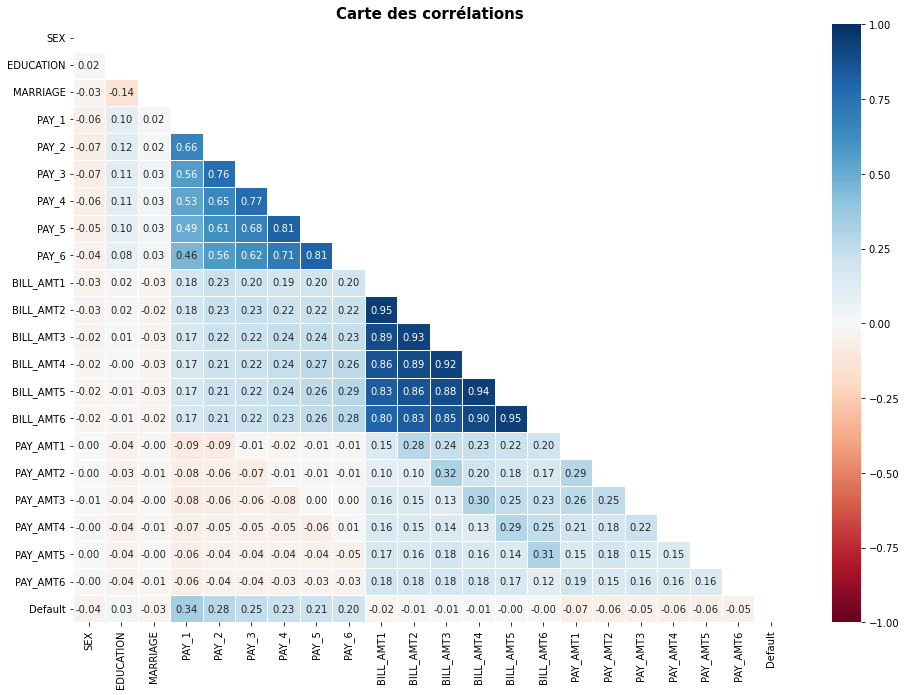

In [14]:
#graphique - croisement deux à deux des variables
#Create Correlation matrix
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize=(16,11))
sns.heatmap(df.corr(), mask=mask, center=0, cmap='RdBu', linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1) 
plt.title('Carte des corrélations', fontsize = 15, fontweight='bold') 
plt.show()

 ## <font color="blue" size=5 id='pre'>**Preprocessing du jeu de données**</font>

In [15]:
df

,SEX,EDUCATION,MARRIAGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
ID,,,,,,,,,,,,,,,,,,,,,
1,2,2,1,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,689,0,0,0,0,1
2,2,2,2,-1,2,0,0,0,2,2682,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,2,2,2,0,0,0,0,0,0,29239,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,2,2,1,0,0,0,0,0,0,46990,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,1,2,1,-1,0,-1,0,0,0,8617,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,2,2,2,2,2,2,2,2,72557,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29996,1,3,1,0,0,0,0,0,0,188948,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,1,3,2,-1,-1,-1,-1,0,0,1683,...,8979,5190,0,1837,3526,8998,129,0,0,0


In [16]:
#Assign predictors to a variable of ndarray (matrix) type
array = df.values
X = array[:,0:21]
y = array[:,21]
X

array([[    2,     2,     1, ...,     0,     0,     0],
       [    2,     2,     2, ...,  1000,     0,  2000],
       [    2,     2,     2, ...,  1000,  1000,  5000],
       ...,
       [    1,     3,     2, ...,   129,     0,     0],
       [    1,     3,     1, ...,  1926, 52964,  1804],
       [    1,     2,     1, ...,  1000,  1000,  1000]])

In [17]:
#transform the class labels from their original string representation (M and B) into integers

le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 0, ..., 0, 1, 1])

In [18]:
#Creations des testset et trainset
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20824, 21), (20824,), (6942, 21), (6942,))

In [24]:
# On normalise les données
scaler =StandardScaler()
Xs = scaler.fit_transform(X)

## ACP

In [25]:
pca = PCA(n_components=10)
fit = pca.fit(Xs)

In [26]:
X_pca = pca.transform(Xs)

PCA_df = pd.DataFrame()
X_pca.shape

(27766, 10)

In [27]:
PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]
PCA_df['Default'] = df['Default']
PCA_df.dropna(axis=0)

,PCA_1,PCA_2,Default
1,-0.731551,-2.029118,1.0
2,-0.830078,-0.910890,1.0
3,-0.165374,-0.563375,0.0
4,-0.856205,0.044887,0.0
5,-0.153007,-0.573420,0.0
...,...,...,...
27761,3.306073,-3.496036,0.0
27762,2.452336,0.675328,0.0
27763,-1.818750,-0.064801,0.0
27764,0.628513,1.011870,0.0


<AxesSubplot:xlabel='PCA_1', ylabel='PCA_2'>

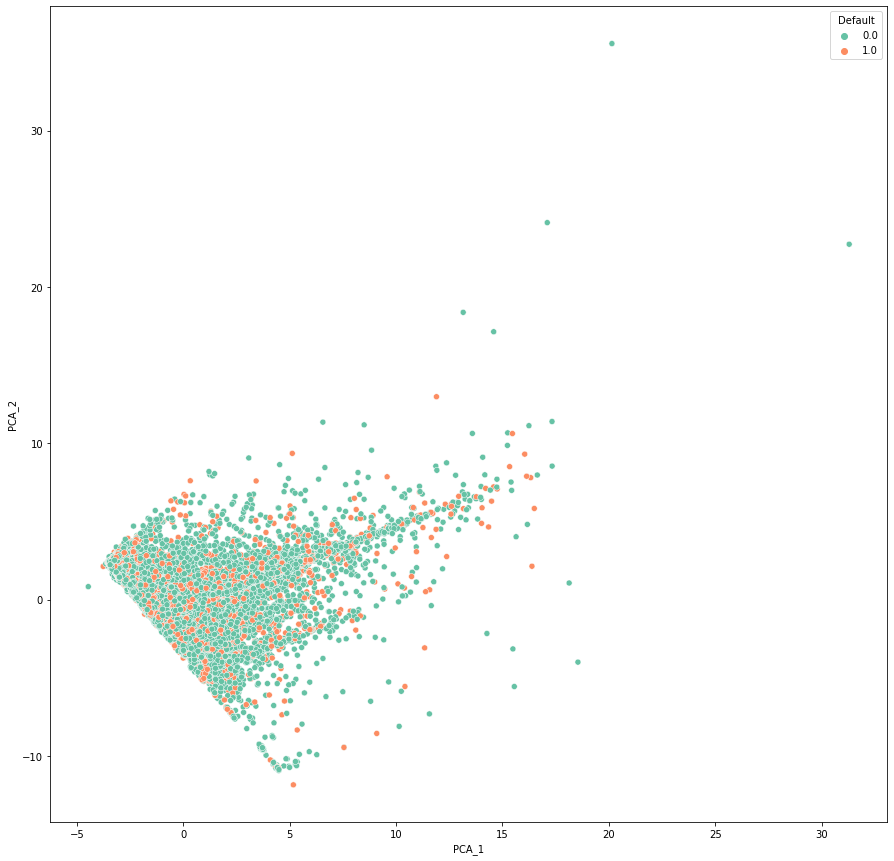

In [28]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=PCA_df, x="PCA_1", y="PCA_2", hue="Default", palette="Set2", sizes=35)

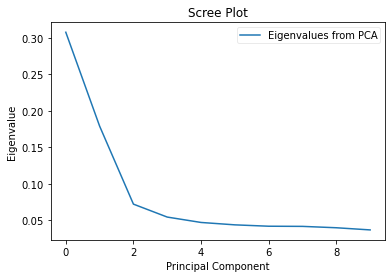

In [29]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
#var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print(var1)

plt.plot(var)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3, shadow=False, markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.set_draggable(state=True)
plt.show()

 ## <font color="blue" size=5 id='mod'>**Prédiction du jeu de données**</font>

Nous allons entrainer différents modèles pour pouvoir prédire les defaults des paiements bancaires

## Arbre de décision

In [127]:
model_tree = DecisionTreeClassifier(max_depth=10, random_state=14) 
model_tree.fit(X_train, y_train)
predict_tree = model_tree.predict(X_test)
print("Le score du DecisonTreeClassifier est de:",accuracy_score(y_true = y_test, y_pred = predict_tree)*100,"%")

Le score du DecisonTreeClassifier est de: 81.1869778161913 %


In [128]:
#On améliore les paramètres du DecisionTreeClassifier
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')

grid_tree.fit(X_train, y_train)
print("Les meilleurs paramètres pour ce modèle sont:",grid_tree.best_estimator_)
print("-------------------------------------------------------------------------------------------------")
print("Le pourcentage max peut être de:", np.abs(grid_tree.best_score_)*100,"%")

Les meilleurs paramètres pour ce modèle sont: DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10)
-------------------------------------------------------------------------------------------------
Le pourcentage max peut être de: 82.4001047104721 %


In [129]:
#Ajustons notre modèle
model_tree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best')
model_tree.fit(X_train, y_train)
pred_dtree = model_tree.predict(X_test)
print("Le nouveau score du modèle DecisionTreeClassifier est de:",accuracy_score(y_true = y_test, y_pred = pred_dtree)*100,"%")
x_pred = model_tree.predict(X_train)
print("Le modèle DecisionTreeClassifier(Train_score) a un score de:",accuracy_score(y_train, x_pred)*100,"%")
score_dtree = accuracy_score(y_true = y_test, y_pred = pred_dtree)*100

Le nouveau score du modèle DecisionTreeClassifier est de: 82.0368769806972 %
Le modèle DecisionTreeClassifier(Train_score) a un score de: 82.46254321936227 %


In [130]:
print("Rapport DecisionTreeClassifier:")
print("==============================================================================")
print(metrics.classification_report(y_test, pred_dtree, labels = [0, 1]))
rapport_dtree = metrics.classification_report(y_test, pred_dtree, labels = [0, 1])

Rapport DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5408
           1       0.66      0.38      0.48      1534

    accuracy                           0.82      6942
   macro avg       0.75      0.66      0.69      6942
weighted avg       0.80      0.82      0.80      6942



In [131]:
N, train_score, val_score = learning_curve(model_tree, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1, 1, 10))

In [132]:
courbe_dtree = val_score
courbe_dtree_train = train_score

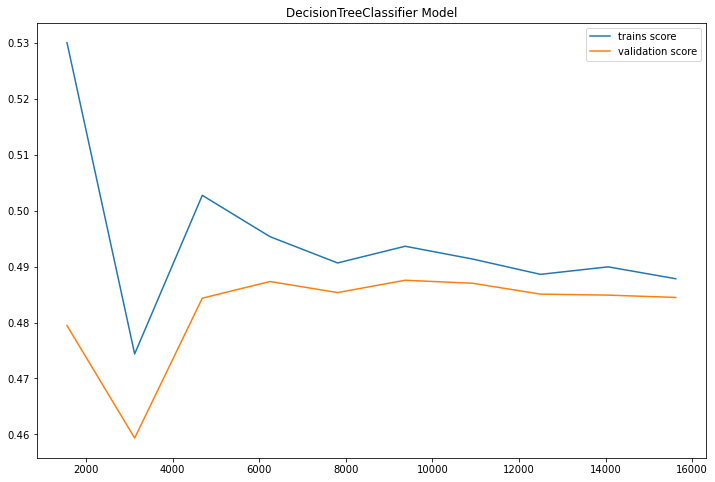

In [133]:
plt.figure(figsize=(12,8))
plt.title("DecisionTreeClassifier Model")
plt.plot(N, train_score.mean(axis=1), label='trains score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

## RandomForestClassifier

In [121]:
#Recherches des meilleures paramètres
sample_leaf_options = [10,20,30,40,50]
n_estimators = [100,120,140,160,180,200]
for leaf_size in sample_leaf_options:
  for n in n_estimators:
    rforest_model = RandomForestClassifier(n_estimators=n,random_state = 42,min_samples_leaf=leaf_size)
    rforest_model.fit(X_train,y_train)
    pred_rforest = rforest_model.predict(X_test)
    print("\nLeaf Size :", leaf_size)
    print("n_estimators: ", n)
    print("Accuracy: ",metrics.accuracy_score(y_test, pred_rforest))


Leaf Size : 10
n_estimators:  100
Accuracy:  0.8186401613367905

Leaf Size : 10
n_estimators:  120
Accuracy:  0.8186401613367905

Leaf Size : 10
n_estimators:  140
Accuracy:  0.8196485162777297

Leaf Size : 10
n_estimators:  160
Accuracy:  0.8197925669835783

Leaf Size : 10
n_estimators:  180
Accuracy:  0.819072313454336

Leaf Size : 10
n_estimators:  200
Accuracy:  0.8184961106309421

Leaf Size : 20
n_estimators:  100
Accuracy:  0.8192163641601844

Leaf Size : 20
n_estimators:  120
Accuracy:  0.8193604148660328

Leaf Size : 20
n_estimators:  140
Accuracy:  0.8189282627484875

Leaf Size : 20
n_estimators:  160
Accuracy:  0.818784212042639

Leaf Size : 20
n_estimators:  180
Accuracy:  0.8186401613367905

Leaf Size : 20
n_estimators:  200
Accuracy:  0.8196485162777297

Leaf Size : 30
n_estimators:  100
Accuracy:  0.8215211754537597

Leaf Size : 30
n_estimators:  120
Accuracy:  0.8209449726303659

Leaf Size : 30
n_estimators:  140
Accuracy:  0.8212330740420628

Leaf Size : 30
n_estimator

In [122]:
rforest_model = RandomForestClassifier(n_estimators=180,random_state = 42,min_samples_leaf=30)
rforest_model.fit(X_train,y_train)
pred_rforest = rforest_model.predict(X_test)
print("Le score du RandomForestClassifier est de: ",metrics.accuracy_score(y_test, pred_rforest)*100,"%")
x_rfpred = rforest_model.predict(X_train)
print("Le modèle RandomForestClassifier(Train_score) a un score de:",accuracy_score(y_train, x_rfpred)*100,"%")
score_rforest = metrics.accuracy_score(y_test, pred_rforest)*100

Le score du RandomForestClassifier est de:  82.13771247479113 %
Le modèle RandomForestClassifier(Train_score) a un score de: 83.02439492892816 %


In [123]:
print("Rapport RandomForestClassifier:")
print("==============================================================================")
print(metrics.classification_report(y_test, pred_rforest, labels = [0, 1]))
rapport_rforest = metrics.classification_report(y_test, pred_rforest, labels = [0, 1])

Rapport RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5408
           1       0.67      0.38      0.49      1534

    accuracy                           0.82      6942
   macro avg       0.76      0.66      0.69      6942
weighted avg       0.80      0.82      0.80      6942



In [124]:
N, train_score, val_score = learning_curve(rforest_model, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1, 1, 10))

In [125]:
courbe_rforest = val_score
courbe_rforest_train = train_score

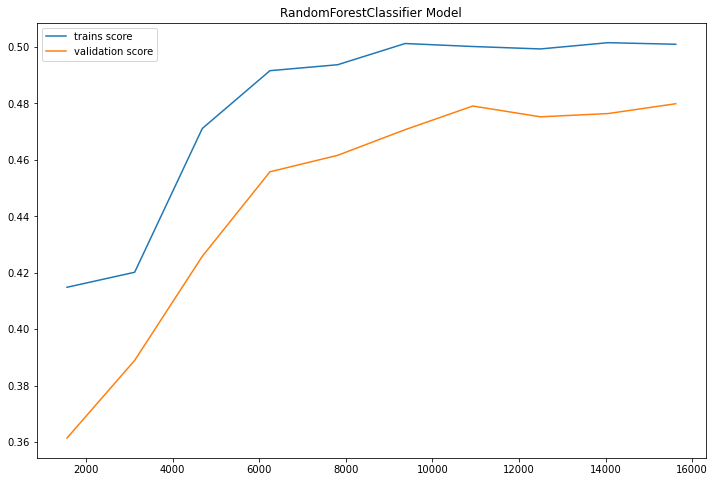

In [126]:
plt.figure(figsize=(12,8))
plt.title("RandomForestClassifier Model")
plt.plot(N, train_score.mean(axis=1), label='trains score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

<font size=4><u><strong>Remarque:</strong></u></font> Sur 1534 observations, on detecte 38% de defaults de paiements corrects

## K-NN

In [114]:
#Paramètrage du modèle KNN
neighbors = np.arange(1,25)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

In [115]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print("Le score du modèle K-NN est de:",knn.score(X_test,y_test)*100,"%")
print("Le score du modèle K-NN(Train_score) est de:",knn.score(X_train,y_train)*100,"%")
score_knn = knn.score(X_test,y_test)*100

Le score du modèle K-NN est de: 78.26274848746759 %
Le score du modèle K-NN(Train_score) est de: 78.3663081060315 %


In [120]:
print("Rapport K-NN:")
print("==============================================================================")
print(metrics.classification_report(y_test, pred_knn, labels = [0, 1]))
rapport_knn = metrics.classification_report(y_test, pred_knn, labels = [0, 1])

Rapport K-NN:
              precision    recall  f1-score   support

           0       0.78      0.99      0.88      5408
           1       0.63      0.04      0.07      1534

    accuracy                           0.78      6942
   macro avg       0.71      0.52      0.48      6942
weighted avg       0.75      0.78      0.70      6942



In [117]:
N, train_score, val_score = learning_curve(knn, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1, 1, 10))

In [118]:
courbe_knn = val_score
courbe_knn_train = train_score

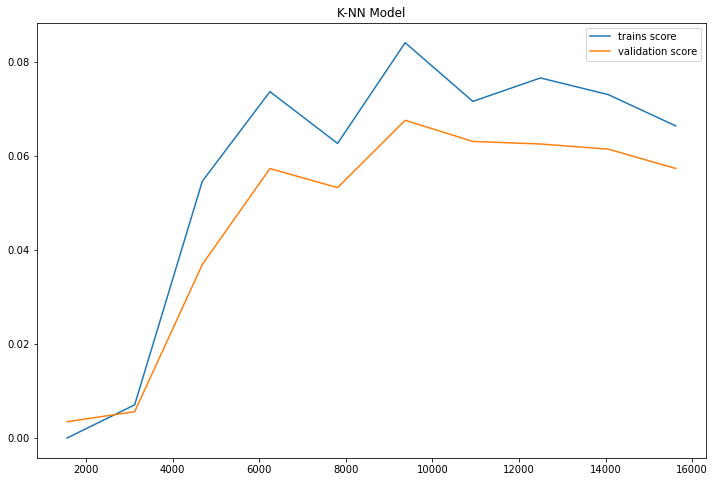

In [119]:
plt.figure(figsize=(12,8))
plt.title("K-NN Model")
plt.plot(N, train_score.mean(axis=1), label='trains score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

## Regression Logistique

In [162]:
classifier = LogisticRegression(solver='liblinear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#classifier.score(X_test,y_test)
print("La score du modèle de Regression Logistique est:", metrics.accuracy_score(y_pred,y_test)*100,"%")

La score du modèle de Regression Logistique est: 79.73206568712186 %


In [163]:
print("Rapport Regression Logistique:")
print("==============================================================================")
print(classification_report(y_test, y_pred))

Rapport Regression Logistique:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      5408
           1       0.64      0.19      0.29      1534

    accuracy                           0.80      6942
   macro avg       0.72      0.58      0.59      6942
weighted avg       0.77      0.80      0.75      6942



In [164]:
#paramétrage de la Regression Logistique
params = [ {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['Ibfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter' : [100, 1000,2500, 5000]
}
]

In [165]:
logmodel = LogisticRegression()
clf = GridSearchCV(logmodel,param_grid = params, cv=3, verbose=True,n_jobs=-1)

In [166]:
clf.fit(X_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/armandbryan/opt/anaconda3/lib/python3.9/site-package

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['Ibfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [168]:
print(clf.best_params_)

{'C': 1.623776739188721, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [169]:
print(clf.best_score_)

0.8148770294819904


In [170]:
classifier = LogisticRegression(C=1.623776739188721, max_iter= 2500, penalty='l1', solver='liblinear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#classifier.score(X_test,y_test)
print("La score du modèle de Regression Logistique est:", metrics.accuracy_score(y_pred,y_test)*100,"%")
score_reglog = metrics.accuracy_score(y_pred,y_test)*100

La score du modèle de Regression Logistique est: 81.14376260443676 %


In [171]:
print("Rapport Regression Logistique:")
print("==============================================================================")
print(classification_report(y_test, y_pred))
rapport_reglog = classification_report(y_test, y_pred)

Rapport Regression Logistique:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5408
           1       0.69      0.26      0.38      1534

    accuracy                           0.81      6942
   macro avg       0.76      0.62      0.64      6942
weighted avg       0.79      0.81      0.78      6942



In [172]:
N, train_score, val_score = learning_curve(classifier, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1, 1, 10))

In [173]:
courbe_logistic = val_score
courbe_logistic_train = train_score

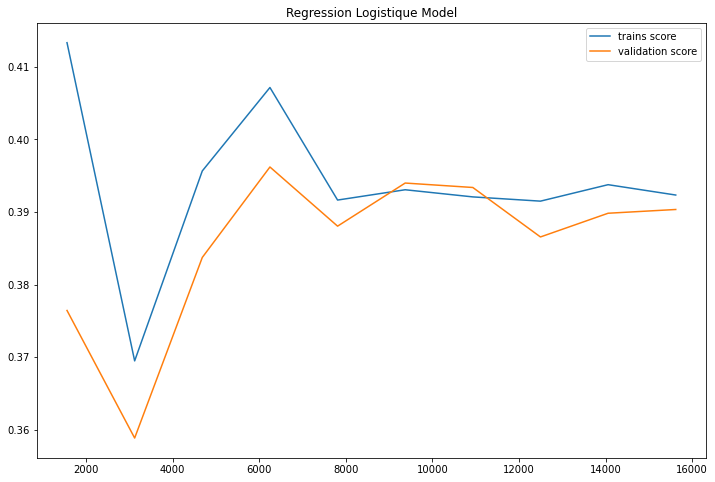

In [174]:
plt.figure(figsize=(12,8))
plt.title("Regression Logistique Model")
plt.plot(N, train_score.mean(axis=1), label='trains score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

## AdaBoost

In [158]:
#On developpe le model
gnb=AdaBoostClassifier(n_estimators=100, learning_rate=10, algorithm='SAMME.R')
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print("Le score du modèle AdaBoost est:", accuracy_score(y_pred, y_test)*100,"%")
x_pred = gnb.predict(X_train)
print("Le modèle AdaBoost(Train_score) a un score de:",accuracy_score(y_train, x_pred)*100,"%")
score_ada = accuracy_score(y_pred, y_test)*100

Le score du modèle AdaBoost est: 82.2241428983002 %
Le modèle AdaBoost(Train_score) a un score de: 82.10718401844026 %


In [159]:
print("Rapport AdaBoost:")
print("==============================================================================")
print(classification_report(y_test, y_pred))
rapport_ada = classification_report(y_test, y_pred)

Rapport AdaBoost:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      5408
           1       0.70      0.34      0.46      1534

    accuracy                           0.82      6942
   macro avg       0.77      0.65      0.68      6942
weighted avg       0.81      0.82      0.80      6942

[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=12, min_child_weight=3;, score=0.761 total time=   3.3s
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=12, min_child_weight=3;, score=0.769 total time=   3.9s
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=12, min_child_weight=3;, score=0.760 total time=   4.1s
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=5;, score=0.755 total time=   1.7s
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=20, max_depth=8, min_child_weight=5;, score=0.391 total time=   0.3s
[C

In [57]:
#On améliore les paramètres du DecisionTreeClassifier
parameters = {
'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30,40,50,100],
    'learning_rate': np.linspace(1,50,20),
    'algorithm': ['SAMME.R','SAMME']
}
ada = GridSearchCV(gnb, parameters, scoring='f1', cv=8, verbose=2, n_jobs=16)
ada.fit(X_train, y_train)

Fitting 8 folds for each of 680 candidates, totalling 5440 fits
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=1; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=3; total time=   0.2s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=3; total time=   0.2s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=3; total time=   0.2s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=4; total time=   0.3s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=6; total time=   0.4s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=8; total time=   0.5s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=10; total time=   0.6s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=12; total time=   0.7s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=30; total time=   1.7s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=50; total time=   2.9s
[CV] END algorithm=SAMME.R, le

/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.

[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=2; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=5; total time=   0.3s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=7; total time=   0.4s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=9; total time=   0.5s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=11; total time=   0.6s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=20; total time=   1.1s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=40; total time=   2.2s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=100; total time=   5.8s
[CV] END algorithm=SAMME.R, learning_rate=3.5789473684210527, n_estimators=20; total time=   1.2s
[CV] END algorithm=SAMME.R, learning_rate=3.5789473684210527, n_estimators=40; total time=   2.2s
[CV] END algorithm=SAMME.R, learning_rate=3.5789473684210527, n_estimators=100; total time=   5.7s
[CV] END algorithm=SAMME.R, learning_rate=6.

teration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  esti

[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=1; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=3; total time=   0.2s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=4; total time=   0.3s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=6; total time=   0.4s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=8; total time=   0.5s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=10; total time=   0.6s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=12; total time=   0.7s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=30; total time=   1.7s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=50; total time=   3.0s
[CV] END algorithm=SAMME.R, learning_rate=3.5789473684210527, n_estimators=3; total time=   0.2s
[CV] END algorithm=SAMME.R, learning_rate=3.5789473684210527, n_estimators=4; total time=   0.3s
[CV] END algorithm=SAMME.R, learning_rate=3.5789473684210527, n_

.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.

.R, learning_rate=21.63157894736842, n_estimators=5; total time=   0.4s
[CV] END algorithm=SAMME.R, learning_rate=21.63157894736842, n_estimators=6; total time=   0.5s
[CV] END algorithm=SAMME.R, learning_rate=21.63157894736842, n_estimators=7; total time=   0.5s
[CV] END algorithm=SAMME.R, learning_rate=21.63157894736842, n_estimators=8; total time=   0.5s
[CV] END algorithm=SAMME.R, learning_rate=21.63157894736842, n_estimators=9; total time=   0.8s
[CV] END algorithm=SAMME.R, learning_rate=21.63157894736842, n_estimators=10; total time=   0.8s
[CV] END algorithm=SAMME.R, learning_rate=21.63157894736842, n_estimators=11; total time=   0.8s
[CV] END algorithm=SAMME.R, learning_rate=21.63157894736842, n_estimators=20; total time=   1.6s
[CV] END algorithm=SAMME.R, learning_rate=21.63157894736842, n_estimators=40; total time=   2.8s
[CV] END algorithm=SAMME.R, learning_rate=21.63157894736842, n_estimators=100; total time=   7.2s
[CV] END algorithm=SAMME.R, learning_rate=24.2105263157894

ights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped

ning_rate=8.736842105263158, n_estimators=40; total time=   2.6s
[CV] END algorithm=SAMME, learning_rate=8.736842105263158, n_estimators=100; total time=   7.0s
[CV] END algorithm=SAMME, learning_rate=11.31578947368421, n_estimators=20; total time=   1.3s


n.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, caus

[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=1; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=3; total time=   0.2s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=4; total time=   0.3s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=6; total time=   0.4s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=8; total time=   0.5s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=10; total time=   0.6s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=12; total time=   0.7s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=30; total time=   1.7s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=50; total time=   2.9s
[CV] END algorithm=SAMME.R, learning_rate=3.5789473684210527, n_estimators=1; total time=   0.0s
[CV] END algorithm=SAMME.R, learning_rate=3.5789473684210527, n_estimators=2; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=3.5789473684210527, n_

np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_v

[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=1; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=3; total time=   0.2s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=4; total time=   0.2s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=6; total time=   0.4s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=8; total time=   0.5s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=10; total time=   0.6s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=12; total time=   0.7s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=30; total time=   1.7s
[CV] END algorithm=SAMME.R, learning_rate=1.0, n_estimators=50; total time=   3.0s
[CV] END algorithm=SAMME.R, learning_rate=3.5789473684210527, n_estimators=2; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=3.5789473684210527, n_estimators=3; total time=   0.2s
[CV] END algorithm=SAMME.R, learning_rate=3.5789473684210527, n_

ng: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_sele

ng_rate=13.894736842105264, n_estimators=9; total time=   0.5s
[CV] END algorithm=SAMME.R, learning_rate=13.894736842105264, n_estimators=10; total time=   0.6s
[CV] END algorithm=SAMME.R, learning_rate=13.894736842105264, n_estimators=11; total time=   0.7s
[CV] END algorithm=SAMME.R, learning_rate=13.894736842105264, n_estimators=12; total time=   0.8s
[CV] END algorithm=SAMME.R, learning_rate=13.894736842105264, n_estimators=30; total time=   2.1s
[CV] END algorithm=SAMME.R, learning_rate=13.894736842105264, n_estimators=50; total time=   3.3s
[CV] END algorithm=SAMME.R, learning_rate=16.473684210526315, n_estimators=1; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=16.473684210526315, n_estimators=2; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=16.473684210526315, n_estimators=3; total time=   0.2s
[CV] END algorithm=SAMME.R, learning_rate=16.473684210526315, n_estimators=4; total time=   0.2s
[CV] END algorithm=SAMME.R, learning_rate=16.47368421052631

n/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/

[CV] END algorithm=SAMME.R, learning_rate=42.26315789473684, n_estimators=3; total time=   0.2s
[CV] END algorithm=SAMME.R, learning_rate=42.26315789473684, n_estimators=4; total time=   0.3s
[CV] END algorithm=SAMME.R, learning_rate=42.26315789473684, n_estimators=5; total time=   0.3s
[CV] END algorithm=SAMME.R, learning_rate=42.26315789473684, n_estimators=6; total time=   0.4s
[CV] END algorithm=SAMME.R, learning_rate=42.26315789473684, n_estimators=7; total time=   0.4s
[CV] END algorithm=SAMME.R, learning_rate=42.26315789473684, n_estimators=8; total time=   0.5s
[CV] END algorithm=SAMME.R, learning_rate=42.26315789473684, n_estimators=9; total time=   0.6s
[CV] END algorithm=SAMME.R, learning_rate=42.26315789473684, n_estimators=10; total time=   0.7s
[CV] END algorithm=SAMME.R, learning_rate=42.26315789473684, n_estimators=11; total time=   0.7s
[CV] END algorithm=SAMME.R, learning_rate=42.26315789473684, n_estimators=12; total time=   0.8s
[CV] END algorithm=SAMME.R, learning_

inite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the lea

ND algorithm=SAMME, learning_rate=1.0, n_estimators=12; total time=   0.8s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=30; total time=   2.0s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=50; total time=   3.3s
[CV] END algorithm=SAMME, learning_rate=3.5789473684210527, n_estimators=1; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=3.5789473684210527, n_estimators=2; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=3.5789473684210527, n_estimators=3; total time=   0.2s
[CV] END algorithm=SAMME, learning_rate=3.5789473684210527, n_estimators=4; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=3.5789473684210527, n_estimators=5; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=3.5789473684210527, n_estimators=6; total time=   0.4s
[CV] END algorithm=SAMME, learning_rate=3.5789473684210527, n_estimators=7; total time=   0.5s
[CV] END algorithm=SAMME, learning_rate=3.5789473684210527, n_estimators=8; total time=   0.5s
[CV

semble/_weight_boosting.py:676: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite valu

[CV] END algorithm=SAMME.R, learning_rate=34.526315789473685, n_estimators=20; total time=   1.3s
[CV] END algorithm=SAMME.R, learning_rate=34.526315789473685, n_estimators=40; total time=   2.6s
[CV] END algorithm=SAMME.R, learning_rate=34.526315789473685, n_estimators=100; total time=   6.6s
[CV] END algorithm=SAMME.R, learning_rate=37.10526315789474, n_estimators=12; total time=   0.8s
[CV] END algorithm=SAMME.R, learning_rate=37.10526315789474, n_estimators=30; total time=   2.0s
[CV] END algorithm=SAMME.R, learning_rate=37.10526315789474, n_estimators=50; total time=   3.2s
[CV] END algorithm=SAMME.R, learning_rate=39.68421052631579, n_estimators=1; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=39.68421052631579, n_estimators=1; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=39.68421052631579, n_estimators=2; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=39.68421052631579, n_estimators=3; total time=   0.2s
[CV] END algorithm=SAMME.R, le

kages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: overflow encountered in 

me=   0.3s
[CV] END algorithm=SAMME, learning_rate=21.63157894736842, n_estimators=5; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=21.63157894736842, n_estimators=6; total time=   0.4s
[CV] END algorithm=SAMME, learning_rate=21.63157894736842, n_estimators=7; total time=   0.5s
[CV] END algorithm=SAMME, learning_rate=21.63157894736842, n_estimators=8; total time=   0.6s
[CV] END algorithm=SAMME, learning_rate=21.63157894736842, n_estimators=9; total time=   0.6s
[CV] END algorithm=SAMME, learning_rate=21.63157894736842, n_estimators=10; total time=   0.6s
[CV] END algorithm=SAMME, learning_rate=21.63157894736842, n_estimators=11; total time=   0.7s
[CV] END algorithm=SAMME, learning_rate=21.63157894736842, n_estimators=12; total time=   0.8s
[CV] END algorithm=SAMME, learning_rate=21.63157894736842, n_estimators=30; total time=   2.1s
[CV] END algorithm=SAMME, learning_rate=21.63157894736842, n_estimators=50; total time=   3.4s
[CV] END algorithm=SAMME, learning_rate=24.2

: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbry

[CV] END algorithm=SAMME.R, learning_rate=44.8421052631579, n_estimators=30; total time=   2.2s
[CV] END algorithm=SAMME.R, learning_rate=44.8421052631579, n_estimators=50; total time=   3.6s
[CV] END algorithm=SAMME.R, learning_rate=47.421052631578945, n_estimators=1; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=47.421052631578945, n_estimators=1; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=47.421052631578945, n_estimators=2; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=47.421052631578945, n_estimators=3; total time=   0.2s
[CV] END algorithm=SAMME.R, learning_rate=47.421052631578945, n_estimators=4; total time=   0.3s
[CV] END algorithm=SAMME.R, learning_rate=47.421052631578945, n_estimators=5; total time=   0.3s
[CV] END algorithm=SAMME.R, learning_rate=47.421052631578945, n_estimators=6; total time=   0.4s
[CV] END algorithm=SAMME.R, learning_rate=47.421052631578945, n_estimators=7; total time=   0.6s
[CV] END algorithm=SAMME.R, lear

n exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: Sample weights have reached infinite values, at iteration 1, causing overflow. Iterations stopped. Try lowering the learning rate.
  estimator.fit(X_train, y_train, **fit_params)
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:676: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/armandbryan/.local/lib/python3.9/site-packages/sk

GridSearchCV(cv=8,
             estimator=AdaBoostClassifier(learning_rate=10, n_estimators=100),
             n_jobs=16,
             param_grid={'algorithm': ['SAMME.R', 'SAMME'],
                         'learning_rate': array([ 1.        ,  3.57894737,  6.15789474,  8.73684211, 11.31578947,
       13.89473684, 16.47368421, 19.05263158, 21.63157895, 24.21052632,
       26.78947368, 29.36842105, 31.94736842, 34.52631579, 37.10526316,
       39.68421053, 42.26315789, 44.84210526, 47.42105263, 50.        ]),
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          20, 30, 40, 50, 100]},
             scoring='f1', verbose=2)

In [58]:
print(ada.best_params_)

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 10}


In [59]:
print(ada.best_score_)

0.4610264178425135


In [60]:
N, train_score, val_score = learning_curve(gnb, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1, 1, 10))

In [62]:
courbe_ada = val_score
courbe_ada_train = train_score

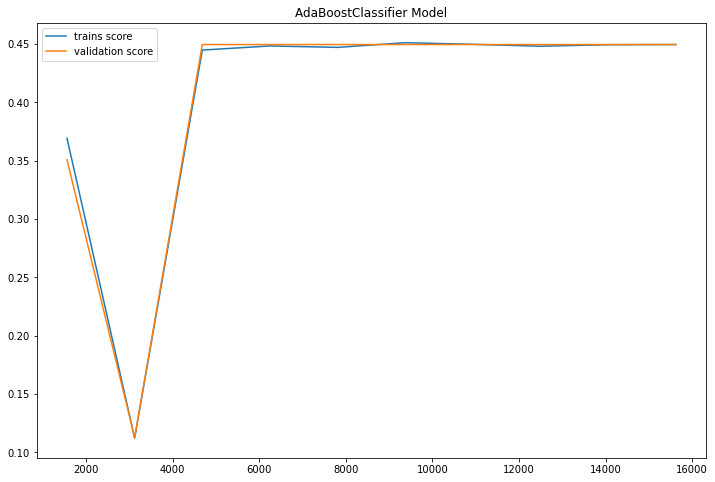

In [63]:
plt.figure(figsize=(12,8))
plt.title("AdaBoostClassifier Model")
plt.plot(N, train_score.mean(axis=1), label='trains score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

<font size=4><u><strong>Remarque:</strong></u></font>La visualisation de la courbe, nous indique que le modèle Adaboost ne pourra plus apprendre. On va passer à un autre modèle

## Xgboost

In [20]:
#On entraine notre modèle xgboost
#X_train=xgb.DMatrix(X_train, label=y_train)
#y_test=xgb.DMatrix(X_test, label=y_test)

In [141]:
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Le modèle XGBoost a un score de:",accuracy_score(y_test, y_pred)*100,"%")

Le modèle XGBoost a un score de: 81.30221838087006 %


In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5408
           1       0.63      0.37      0.47      1534

    accuracy                           0.81      6942
   macro avg       0.74      0.65      0.68      6942
weighted avg       0.79      0.81      0.79      6942



In [143]:
x_pred = model.predict(X_train)
print("Le modèle XGBoost(Train_score) a un score de:",accuracy_score(y_train, x_pred)*100,"%")

Le modèle XGBoost(Train_score) a un score de: 88.35958509412217 %


In [144]:
#Paramètrage
params={
    "learning_rate": [0.05,0.10,0.15,0,20,0.25,0.30],
    "max_depth":[3,4,5,8,10,12,13,15],
    "min_child_weight":[1,3,5,7],
    "gamma": [0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree": [0.3,0.4,0.5,0.7]
}

Nous allons essayer de trouver les meilleures paramètres pour pouvoir optimiser notre modèle XGBoost <br> On utilisera la méthode <i>RandomSearchCV</i>

In [145]:
#RandomSearch
randomsearch=RandomizedSearchCV(model,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [146]:
randomsearch.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300...
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_parallel_tree=1,
                                           predictor='auto', random_state=0, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0,
                                                          20, 0.25, 0.3],
                                        'max_depth': [3, 4, 5, 8, 10, 12, 13,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [147]:
randomsearch.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=13, max_leaves=0, min_child_weight=5, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [148]:
randomsearch.best_params_

{'min_child_weight': 5,
 'max_depth': 13,
 'learning_rate': 0.05,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [149]:
randomsearch.best_score_

0.7682225659093529

In [157]:
model = XGBClassifier(min_child_weight=5, max_depth=3,learning_rate=0.1,gamma=0.2,colsample_bytree=0.5, n_estimators=50)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Le modèle XGBoost a un score de:",accuracy_score(y_test, y_pred)*100,"%")
score_xgb = accuracy_score(y_test, y_pred)*100

Le modèle XGBoost a un score de: 82.20973782771536 %


In [151]:
print("Rapport Xgboost:")
print("==============================================================================")
print(classification_report(y_test, y_pred))
rapport_xgb = classification_report(y_test, y_pred)

Rapport Xgboost:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5408
           1       0.68      0.37      0.48      1534

    accuracy                           0.82      6942
   macro avg       0.76      0.66      0.69      6942
weighted avg       0.81      0.82      0.80      6942



In [152]:
score=cross_val_score(model,X_train,y_train, cv=10)

In [153]:
score.mean()

0.8238091351100325

On va visualiser notre modèle

In [154]:
N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1, 1, 10))

In [155]:
courbe_xgb = val_score
courbe_xgb_train = train_score

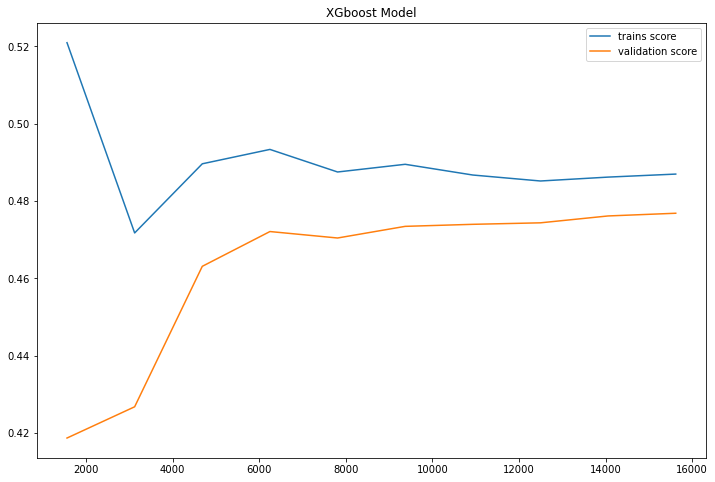

In [156]:
plt.figure(figsize=(12,8))
plt.title("XGboost Model")
plt.plot(N, train_score.mean(axis=1), label='trains score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

## SVM

In [134]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False),SelectKBest(f_classif, k=20))

In [135]:
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))

In [136]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest(k=20))])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [137]:
model_svm =SVM
model_svm.fit(X_train,y_train)
y_pred = model_svm.predict(X_test)
print("Le modèle SVM a un score de:",accuracy_score(y_test, y_pred)*100,"%")
score_svm = accuracy_score(y_test, y_pred)*100

Le modèle SVM a un score de: 81.8496110630942 %


In [138]:
#paramètrage 
#On créer un dictionnaire pour nos hyperparamètres
params ={'svc__gamma':[1e-3, 1e-4], 
               'svc__C':[1, 10,100,1000],
              'pipeline__polynomialfeatures__degree':[2,3,4],
              'pipeline__seletkbest__k': range(4, 100)}

In [140]:
print("Rapport SVM:")
print("==============================================================================")
print(classification_report(y_test, y_pred))
rapport_svm = classification_report(y_test, y_pred)

Rapport SVM:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5408
           1       0.66      0.37      0.48      1534

    accuracy                           0.82      6942
   macro avg       0.75      0.66      0.68      6942
weighted avg       0.80      0.82      0.80      6942



In [86]:
#randsvm=RandomizedSearchCV(model_svm,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

### Visualisation

In [87]:
N, train_score, val_score = learning_curve(model_svm, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1, 1, 10))

In [88]:
courbe_svm = val_score
courbe_svm_train = train_score

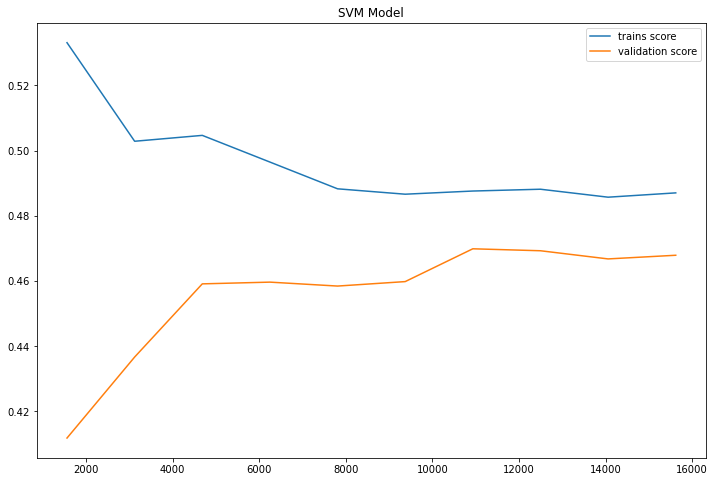

In [89]:
plt.figure(figsize=(12,8))
plt.title("SVM Model")
plt.plot(N, train_score.mean(axis=1), label='trains score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

 ## <font color="blue" size=5 id='eval'>**Evaluation et Comparaison du jeu de données**</font>

Nous ferons ici une visualisation de l'ensemble de nos modèles pour voir celui qui prédit le mieux les defaults des paiements bancaires. <br> On commence par visualiser l'ensemble des scores obtenus.<br>Nous avons 07 modèles:
* DecisionTreeClassifier
* RandomForestClassifier
* K-NN
* Regression Logistique
* AdaBoostClassifier
* XGBClassifier
* SVC

### Dictionnaires
On va créer des dictionnaires qui nous serviront dans la visualisation de nos données.

In [160]:
scores_dict = {
    "DecisionTreeClassifier": score_dtree,
    "RandomForestClassifier": score_rforest,
    "K-NN": score_knn,
    "Regression Logistique": score_reglog,
    "AdaBoostClassifier": score_ada,
    "XGBClassifier": score_xgb,
    "SVM": score_svm
}

In [175]:
rapport_dict = {
    "DecisionTreeClassifier": rapport_dtree,
    "RandomForestClassifier": rapport_rforest,
    "K-NN": rapport_knn,
    "Regression Logistique": rapport_reglog,
    "AdaBoostClassifier": rapport_ada,
    "XGBClassifier": rapport_xgb,
    "SVM": rapport_svm
}

## Score des modèles

In [178]:
for name, model in scores_dict.items():
    print("Modèle:",name, "      ", model,"%")
    print("-----------------------------------------------------------------------")

Modèle: DecisionTreeClassifier        82.0368769806972 %
-----------------------------------------------------------------------
Modèle: RandomForestClassifier        82.13771247479113 %
-----------------------------------------------------------------------
Modèle: K-NN        78.26274848746759 %
-----------------------------------------------------------------------
Modèle: Regression Logistique        81.14376260443676 %
-----------------------------------------------------------------------
Modèle: AdaBoostClassifier        82.2241428983002 %
-----------------------------------------------------------------------
Modèle: XGBClassifier        82.20973782771536 %
-----------------------------------------------------------------------
Modèle: SVM        81.8496110630942 %
-----------------------------------------------------------------------


 ## <font size=4><u>**Observations:**</u></font><br>
 <p>Nous concluons que le modèle qui apprend le mieux est AdaBoost, car il a meilleur taux d'apprentissage. Puis vient XGBClassifier, RandomForestClassifier, DecisionTreeClassifier, SVM, Regression Logistique et le K-NN. Les modèles ensemblistes dominent le rang et le DecisionTreeClassifier comprend également bien le modèle comme les modèles ensemblistes</p>

In [181]:
print("Le meilleur modèle est AdaBoostClassifier avec un score de ", scores_dict["AdaBoostClassifier"],"%")

Le meilleur modèle est AdaBoostClassifier avec un score de  82.2241428983002 %


## Rapport d'observation

In [183]:
for name, model in rapport_dict.items():
    print("Modèle:",name, "      ", model,"%")
    print("---------------------------------------------------------------------------------------------------------")

Modèle: DecisionTreeClassifier                      precision    recall  f1-score   support

           0       0.84      0.95      0.89      5408
           1       0.66      0.38      0.48      1534

    accuracy                           0.82      6942
   macro avg       0.75      0.66      0.69      6942
weighted avg       0.80      0.82      0.80      6942
 %
---------------------------------------------------------------------------------------------------------
Modèle: RandomForestClassifier                      precision    recall  f1-score   support

           0       0.84      0.95      0.89      5408
           1       0.67      0.38      0.49      1534

    accuracy                           0.82      6942
   macro avg       0.76      0.66      0.69      6942
weighted avg       0.80      0.82      0.80      6942
 %
---------------------------------------------------------------------------------------------------------
Modèle: K-NN                      precision    recall 

<p>Les modèles apprennent très bien et sont presque équivalent sauf le K-NN qui apprend pas très bien. XGBoost et les arbres de décisions(RandomForest et le DecisonTree) apprennent meiux que les autres et ont des meilleures résultats</p>

## Visualisation des modèles

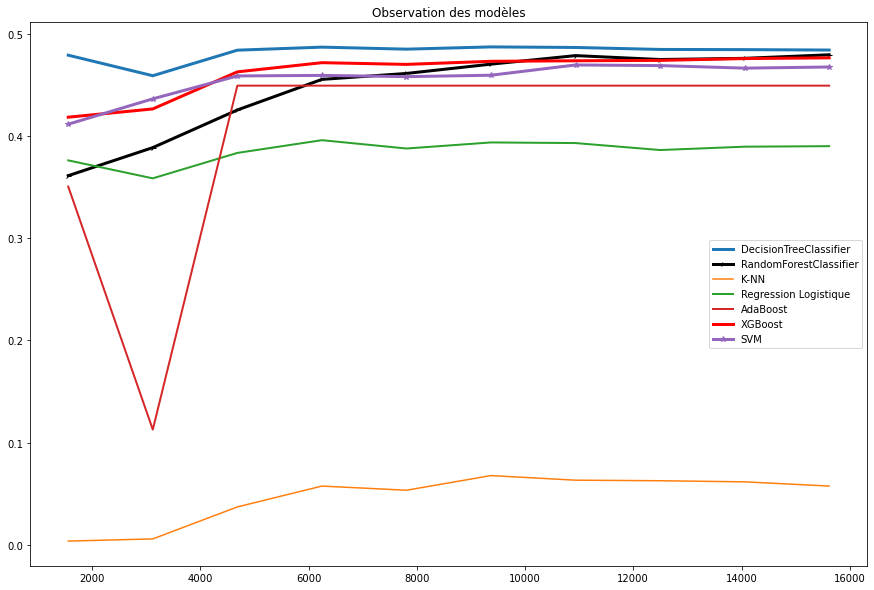

In [227]:
plt.figure(figsize=(15,10))
plt.title("Observation des modèles")
plt.plot(N, courbe_dtree.mean(axis=1), label='DecisionTreeClassifier', linewidth=3)
plt.plot(N, courbe_rforest.mean(axis=1), label='RandomForestClassifier', linewidth=3,color="black",marker='4')
plt.plot(N, courbe_knn.mean(axis=1), label='K-NN')
plt.plot(N, courbe_logistic.mean(axis=1), label='Regression Logistique', linewidth=2)
plt.plot(N, courbe_ada.mean(axis=1), label='AdaBoost',linewidth=2)
plt.plot(N, courbe_xgb.mean(axis=1), label='XGBoost', linewidth=3, color="red")
plt.plot(N, courbe_svm.mean(axis=1), label='SVM', marker='*', linewidth=3)
plt.legend()

 ## <font size=4><u>**Observations:**</u></font><br>
 <p>Il y'a 3 algoithmes donc le taux d'apprentissage est presque similaire(DecisionTreeClassifier, RandomForestClassifier,XGBoost). SVM vient juste après suivi d'AdaBoost, Regression Logistique et en dernier K-NN.</p> <p>La DecisionTreeClassifier est nettement le meilleur modèle d'apprentissage, suivi du RandomForestClassifier et de XGBoost qui sont presque confondus. Ils ont bien compris le jeu de données et sont en constante amélioration.</p><p>Le SVM apprend bien également et il est assez constant comme les 03 premiers.</p><p>Puis vient AdaBoost qui comprennait très mal le jeu de données quand il avait encore près 4000 observations puis survient un pic et reste constant jusqu'à la fin et avec nos analyses précédentes on a vu que AdaBoost ne peut plus apprendre et faire d'amélioration.</p><p>la regression logistique est constante et apprend bien n'a pas une bonne évolutivité comme ceux cité plus haut mais il reste toute fois un bon modèle.</p><p>Le K-NN quant à lui n'a rien compris surtout au début puis essaye de s'améliorer mais il reste toujours largement en dessous des autres</p>

<font size=4><strong><i>Le modèle qui a appris le mieux est le DecisionTreeClassifier</i></strong></font>

On visualise maintenant l'apprentissage du train_score

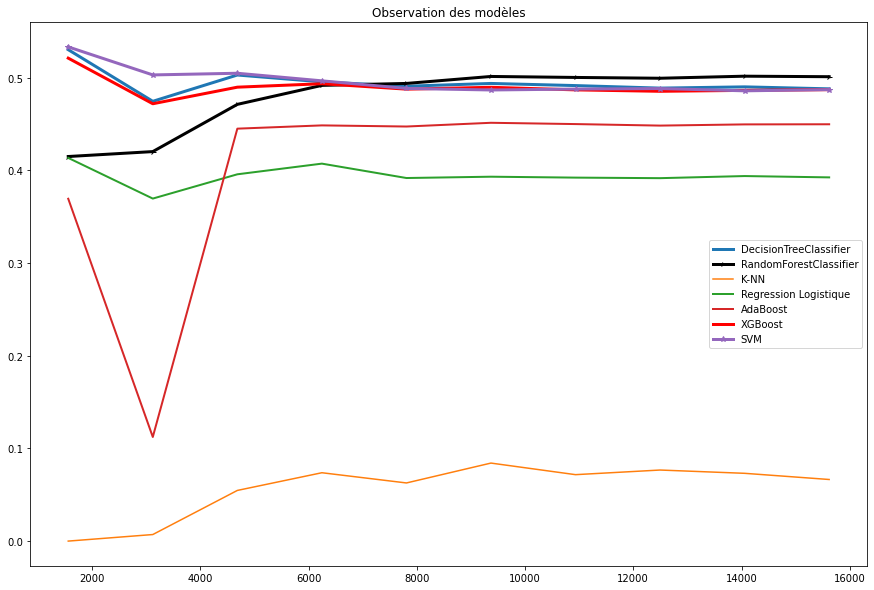

In [229]:
plt.figure(figsize=(15,10))
plt.title("Observation des modèles")
plt.plot(N, courbe_dtree_train.mean(axis=1), label='DecisionTreeClassifier', linewidth=3)
plt.plot(N, courbe_rforest_train.mean(axis=1), label='RandomForestClassifier', linewidth=3,color="black",marker='4')
plt.plot(N, courbe_knn_train.mean(axis=1), label='K-NN')
plt.plot(N, courbe_logistic_train.mean(axis=1), label='Regression Logistique', linewidth=2)
plt.plot(N, courbe_ada_train.mean(axis=1), label='AdaBoost',linewidth=2)
plt.plot(N, courbe_xgb_train.mean(axis=1), label='XGBoost', linewidth=3, color="red")
plt.plot(N, courbe_svm_train.mean(axis=1), label='SVM', marker='*', linewidth=3)
plt.legend()

 ## <font size=4><u>**Observations:**</u></font><br>
 <p>Le RandomForest a le meilleur potentiel, cela signifie que son apprentissage peut être améliorer avec les bons paramètres.</p><p>DecisionTree, XGBoost et SVM se confondent mais on constate un relachement de tous ses modèles à partir de 3000 observations</p><p>AdaBoost ne peut plus apprendre comme dis plus haut, Regression Logistique n'a pas une bonne évolutivité et n'apprend pas très bien malgré sa constante</p><p>K-NN a tout simplement pas bien appris</p>

 ## <font color="blue" size=5 id='am'>**Amélioration de notre modèle RandomForest**</font>

In [231]:
n_estimators = [int(x) for x in np.linspace (start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [242]:
param_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap
}

print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [243]:
rforest_grid = RandomForestClassifier()

In [244]:
rf_grid = GridSearchCV(estimator=rforest_grid, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [257]:
randomsearch=RandomizedSearchCV(rforest_grid,param_distributions=param_grid,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [245]:
rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as 

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [258]:
randomsearch.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   scoring='roc_auc', verbose=3)

In [259]:
randomsearch.best_params_

{'n_estimators': 48,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': True}

In [260]:
randomsearch.best_score_

0.7699338567490113

In [246]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 17}

In [249]:
rf_grid.best_score_

0.8220322742483037

In [261]:
model_rforest = RandomForestClassifier(bootstrap=True,max_depth=4,max_features='auto',min_samples_leaf=2,min_samples_split=5, n_estimators=48)

In [262]:
model_rforest.fit(X_train,y_train)
y_pred = model_rforest.predict(X_test)
print("Le modèle RandomForest a un score de:",accuracy_score(y_test, y_pred)*100,"%")
score_rforestfinal = accuracy_score(y_test, y_pred)*100

/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Le modèle RandomForest a un score de: 80.82685105157015 %


In [263]:
print("Rapport RandomForest:")
print("==============================================================================")
print(classification_report(y_test, y_pred))
rapport_rforestfinal = classification_report(y_test, y_pred)

Rapport RandomForest:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5408
           1       0.65      0.28      0.40      1534

    accuracy                           0.81      6942
   macro avg       0.74      0.62      0.64      6942
weighted avg       0.79      0.81      0.78      6942



In [264]:
N, train_score, val_score = learning_curve(model_rforest, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1, 1, 10))

/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/armandbryan/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as 

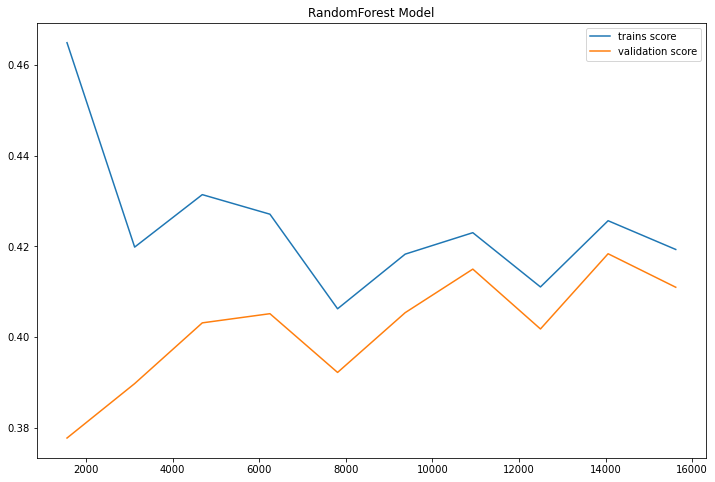

In [265]:
plt.figure(figsize=(12,8))
plt.title("RandomForest Model")
plt.plot(N, train_score.mean(axis=1), label='trains score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()

Le modèle ne peut plus être améliorer davantage

 ## <font color="blue" size=5 id='c'>**Conclusion**</font>

<p>Le modèle qui a un meilleure score est celui de l'AdaBoost avec 82.22% mais est suivi de près par DecisionForestClassifier et le XGB. Le pire score revient au K-NN avec 78.26%</p><p>Le modèle qui a mieux appris et qui trouve le plus de default de paiement est le DecisionTreeClassifier suivi du RandomForest et du XBG qui se confondent. Le K-NN vient en dernière position avec un très mauvais rendu.</p><p>Le modèle qui le mieux appris est le RandomForest sur le Train_score.</p><p>En définitive pour détecter les défaults des cartes bancaires on peut utiliser 03 modèles à savoir:</p>

* DecisionTreeClassifier
* RandomForest
* XGB

<p>En réalité pourquoi 03 modèles? Nous décidons de valider ses 03 modèles car d'après la bourbe ROC ils ont de bonnes performances et ils ont un Recall et un score-f1 identique, raison pour laquelle ses 03 modèles sont peuvent être utilisé pour la identifier les <strong>defaults de paiements bancaires</strong> </p>